In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
from utils import *

In [163]:
d='/glade/derecho/scratch/djk2120/postp/cmip/'
f=d+'CanESM5.postp.c240510.nc'

In [164]:
ds=xr.open_dataset(f)

In [165]:
nens=len(ds.ens)

In [204]:
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['ET','SOILWATER_10CM','PREC']
ds=xr.Dataset()
for v in dvs:
    ds[v]=xr.open_mfdataset(sorted(glob.glob(d+v+'*')),combine='by_coords')[v].sel(year=slice(2020,2100))

In [206]:
dsbs=[]
for yr in range(2000,2003):
    #dvs=['pr','mrsos','hfls']
    dvs=['ET','SOILWATER_10CM','PREC']
    dsets=[]
    while yr<=2100:
        ees=xr.DataArray(np.random.randint(nens,size=[100,150]),dims=['ens','boot'])
        yrs=slice(yr,min(2100,yr+2))
        dsy=ds[dvs].isel(ens=ees).sel(year=yrs)
        dsy['ens']=range(100)
        dsets.append(dsy)
        yr+=3
    dsb=xr.concat(dsets,dim='year').sel(year=slice(2020,2100))
    dsbs.append(dsb)
dsb=xr.concat(dsbs,dim='boot')

In [233]:
def calc_trend(x,y,nq):
    ix=np.argsort(np.argsort(x,axis=0),axis=0)<nq
    lm=y.where(ix).mean(dim='ens').polyfit(dim='year',deg=1)
    trend=lm.polyfit_coefficients.sel(degree=1)
    return trend.compute()
    

In [234]:
v1='SOILWATER_10CM'
v2='PREC'
drys=[]
alls=[]
for b in dsb.boot:
    x=dsb[v1].sel(boot=b).T.compute()
    y=cf*dsb[v2].sel(boot=b).T.compute()
    drys.append(calc_trend(x,y,5))
    alls.append(calc_trend(x,y,100))

(array([ 0.69083626,  3.7995994 ,  8.63545319, 19.68883327, 36.2689034 ,
        34.54181276, 27.63345021, 14.50756136,  7.59919881,  2.07250877]),
 array([-0.03669519, -0.03026177, -0.02382834, -0.01739491, -0.01096149,
        -0.00452806,  0.00190537,  0.00833879,  0.01477222,  0.02120565,
         0.02763907]),
 <BarContainer object of 10 artists>)

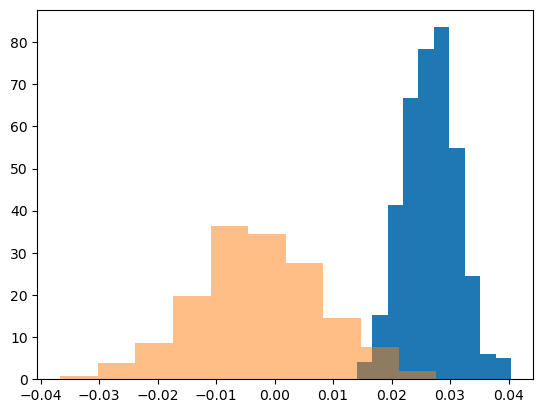

In [235]:
plt.hist(alls,density=True)
plt.hist(drys,alpha=0.5,density=True)

In [193]:
np.mean(alls)

0.04885661587304941

In [194]:
np.mean(drys)

0.04849460884696847

In [209]:
v='pr'
trends=[]
for b in dsb.boot:
    s=dsb.mrsos.sel(boot=b)
    ix=np.argsort(s,axis=0)<5
    x=cf*dsb[v].sel(boot=b).where(ix).mean(dim='ens')
    lm=x.polyfit(dim='year',deg=1)
    trend=lm.polyfit_coefficients.sel(degree=1)
    trends.append(trend)
dry=xr.concat(trends,dim='boot')

AttributeError: 'Dataset' object has no attribute 'mrsos'

In [145]:
trends=[]
for b in dsb.boot:
    s=dsb.SOILWATER_10CM.sel(boot=b)
    ix=s>0
    x=cf*dsb.PREC.sel(boot=b).where(ix).mean(dim='ens')
    lm=x.polyfit(dim='year',deg=1)
    trend=lm.polyfit_coefficients.sel(degree=1)
    trends.append(trend)
all=xr.concat(trends,dim='boot')

(array([ 0.35068482,  0.35068482,  3.15616337, 12.27396867, 28.05478552,
        46.64108093, 32.61368817, 23.14519806,  8.76712048,  2.45479373]),
 array([-0.05299688, -0.04666007, -0.04032326, -0.03398646, -0.02764965,
        -0.02131284, -0.01497603, -0.00863923, -0.00230242,  0.00403439,
         0.0103712 ]),
 <BarContainer object of 10 artists>)

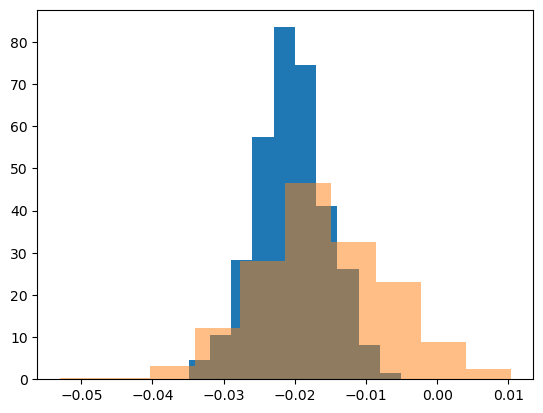

In [162]:
plt.hist(all,density=True)
plt.hist(dry,alpha=0.5,density=True)


In [160]:
s=ds.SOILWATER_10CM.sel(year=slice(2020,2100))
#ix=np.argsort(np.argsort(s,axis=0),axis=0)<2
ix=s>0
x=cf*ds.PREC.where(ix).mean(dim='ens')
lm=x.polyfit(dim='year',deg=1)
trend=lm.polyfit_coefficients.sel(degree=1)

In [161]:
trend

<xarray.DataArray 'polyfit_coefficients' ()>
array(-0.02057734)
Coordinates:
    degree   int64 1

In [159]:
trend

<xarray.DataArray 'polyfit_coefficients' ()>
array(-0.00973995)
Coordinates:
    degree   int64 1

In [147]:
all.mean()

<xarray.DataArray 'polyfit_coefficients' ()>
array(-0.0205368)
Coordinates:
    degree   int64 1

In [148]:
dry.mean()

<xarray.DataArray 'polyfit_coefficients' ()>
array(-0.0161042)
Coordinates:
    degree   int64 1

In [112]:
dsb.PREC

<xarray.DataArray 'SOILWATER_10CM' (ens: 100, year: 81)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])
Coordinates:
  * year     (year) int64 2020 2021 2022 2023 2024 ... 2096 2097 2098 2099 2100
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [93]:
dsb

<xarray.Dataset>
Dimensions:         (ens: 100, boot: 33, year: 81)
Coordinates:
  * year            (year) int64 2020 2021 2022 2023 ... 2097 2098 2099 2100
  * ens             (ens) int64 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
Dimensions without coordinates: boot
Data variables:
    PREC            (ens, boot, year) float64 1.945e-05 2.554e-05 ... 1.755e-05
    SOILWATER_10CM  (ens, boot, year) float64 14.98 16.69 15.88 ... 15.6 14.39
    LHFLX           (ens, boot, year) float64 59.65 60.88 67.61 ... 62.07 60.95
Attributes:
    history:  Tue May 28 11:45:55 2024: ncecat -u ens cesm1.postp.001.nc cesm...
    NCO:      netCDF Operators version 5.1.9 (Homepage = http://nco.sf.net, C...

In [86]:
ees=xr.DataArray(np.random.randint(nens,size=[100,17]),dims=['ens','boot'])
ds.sel(ens=ees)

<xarray.Dataset>
Dimensions:         (year: 181, ens: 100, boot: 17)
Coordinates:
  * year            (year) int64 1920 1921 1922 1923 ... 2097 2098 2099 2100
Dimensions without coordinates: ens, boot
Data variables:
    RAIN            (ens, boot, year) float64 ...
    SNOW            (ens, boot, year) float64 ...
    LHFLX           (ens, boot, year) float64 ...
    SOILWATER_10CM  (ens, boot, year) float64 ...
    PREC            (ens, boot, year) float64 ...
Attributes:
    history:  Tue May 28 11:45:55 2024: ncecat -u ens cesm1.postp.001.nc cesm...
    NCO:      netCDF Operators version 5.1.9 (Homepage = http://nco.sf.net, C...

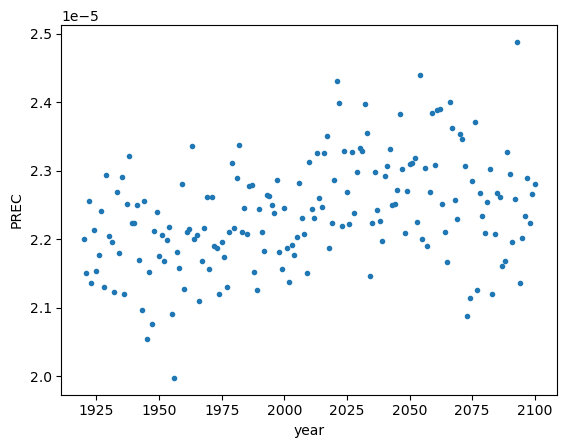

In [52]:
ds.PREC.mean(dim='ens').plot.line('.')

In [45]:
dvs=['RAIN','SNOW','LHFLX','SOILWATER_10CM']
cmp={v:'lnd' for v in dvs}
cmp['LHFLX']='atm'
mem='002'
ds=xr.Dataset()
for v in dvs:
    print(v)
    d='/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/{}/proc/tseries/monthly/{}/'
    f=(d+'b.e11.*BDRD.f09_g16.{}.*.h0.{}.*.nc').format(cmp[v],v,mem,v)
    files=sorted(glob.glob(f))

    dsets=[fix_time(xr.open_dataset(f)) for f in files]
    da=xr.concat([ds[v] for ds in dsets],dim='time')
    la=get_foco(dsets[0])*np.cos(np.deg2rad(dsets[0].lat))
    ds[v]=amean(gmean(da,la),m1=7,m2=9)

ds['PREC']=ds.RAIN+ds.SNOW


RAIN
SNOW
LHFLX
SOILWATER_10CM


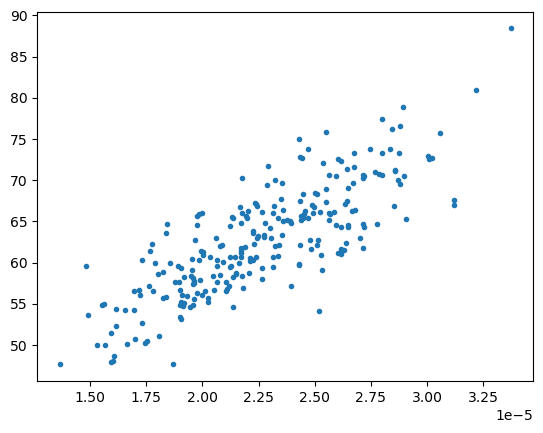

In [44]:
plt.plot(ds.PREC,ds.LHFLX,'.')

In [32]:
x=amean(gmean(ds.SOILWATER_10CM,la),m1=7,m2=9)

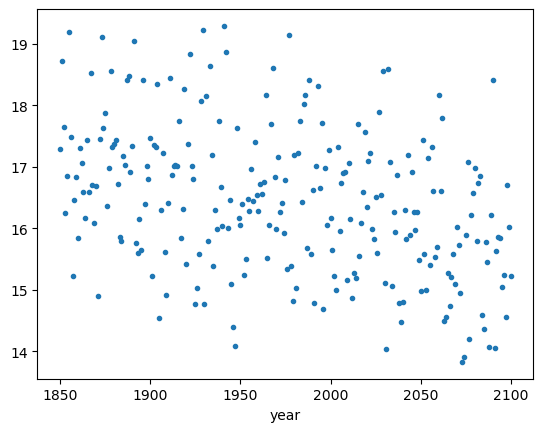

In [33]:
x.plot.line('.')